##  Week 5 Assignment : House Price Prediction.

## Name: Manish Kumar 

Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


Step 2: Load the Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


Step 3: Basic Data Exploration (EDA)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


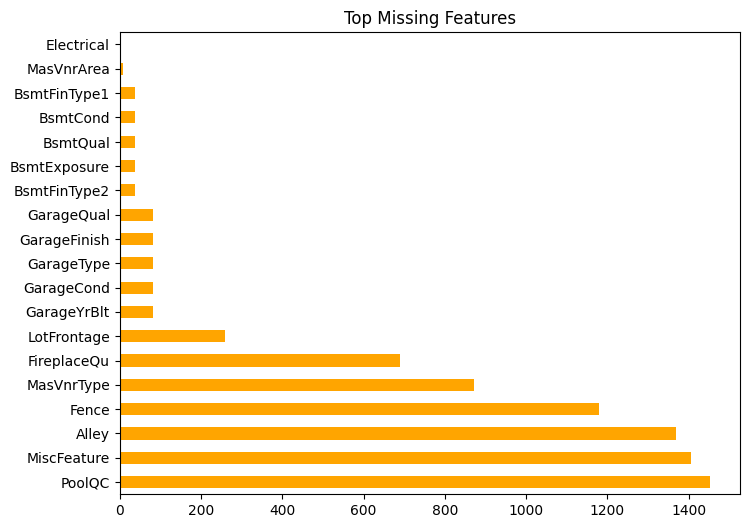

In [5]:
# Top 20 missing values
missing = train.isnull().sum().sort_values(ascending=False)[:20]
missing[missing > 0].plot(kind='barh', figsize=(8,6), color='orange')
plt.title("Top Missing Features")
plt.show()


Step 4: Handle Missing Values

In [6]:
# Handle numerical columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    median_val = train[col].median()
    train[col] = train[col].fillna(median_val)
    if col in test.columns:
        test[col] = test[col].fillna(median_val)

# Handle categorical columns
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)
    if col in test.columns:
        test[col] = test[col].fillna(mode_val)



Step 5: Feature Engineering (One-Hot Encoding)

In [7]:
train_labels = train['SalePrice']
train_ID = train['Id']
test_ID = test['Id']

train['source'] = 'train'
test['source'] = 'test'

combined = pd.concat([train, test], axis=0)

combined_encoded = pd.get_dummies(combined)

train_encoded = combined_encoded[combined_encoded['source_train'] == 1].copy()
test_encoded = combined_encoded[combined_encoded['source_test'] == 1].copy()

train_encoded.drop(['source_train', 'source_test'], axis=1, inplace=True)
test_encoded.drop(['source_train', 'source_test'], axis=1, inplace=True)

train_encoded['SalePrice'] = train_labels.values


In [8]:
print("Train encoded shape:", train_encoded.shape)
print("Test encoded shape:", test_encoded.shape)
train_encoded.head()


Train encoded shape: (1460, 289)
Test encoded shape: (1459, 289)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False


Step 6: Prepare Data for Modeling

In [9]:
X = train_encoded.drop(['Id', 'SalePrice'], axis=1)
y = train_encoded['SalePrice']
test_X = test_encoded.drop(['Id'], axis=1)

X, test_X = X.align(test_X, join='left', axis=1)
# Fill missing columns with 0
test_X = test_X.fillna(0)


 Step 7: Simple Model to Test Preprocessing

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

predictions = model.predict(test_X)


Step 8: Create Submission File

In [11]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})
submission.to_csv("submission.csv", index=False)


Step 9: Correlation Plot

C:\Users\HP\AppData\Local\Temp\ipykernel_12072\1654326741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


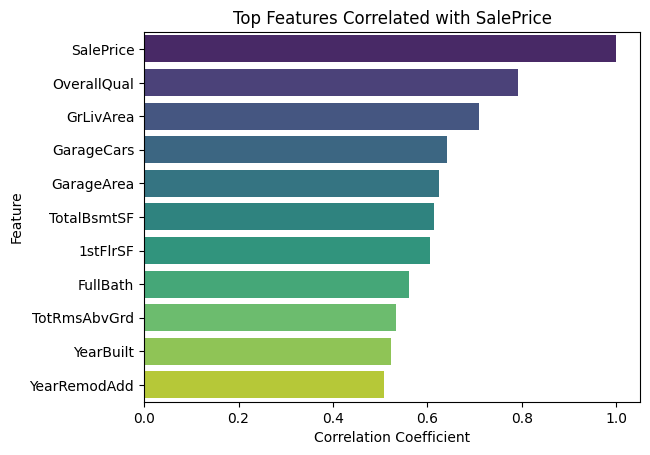

In [12]:

numeric_train = train.select_dtypes(include=[np.number])
corr = numeric_train.corr()
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(11)
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top Features Correlated with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()
